In understanding the concept and implementing the code for specific part of my homework, I received valuable assistance from ChatGPT. The explanation provided by ChatGPT greatly contributed to my comprehension of the topic and aided in the successful completion of this assignment.

# HW-1

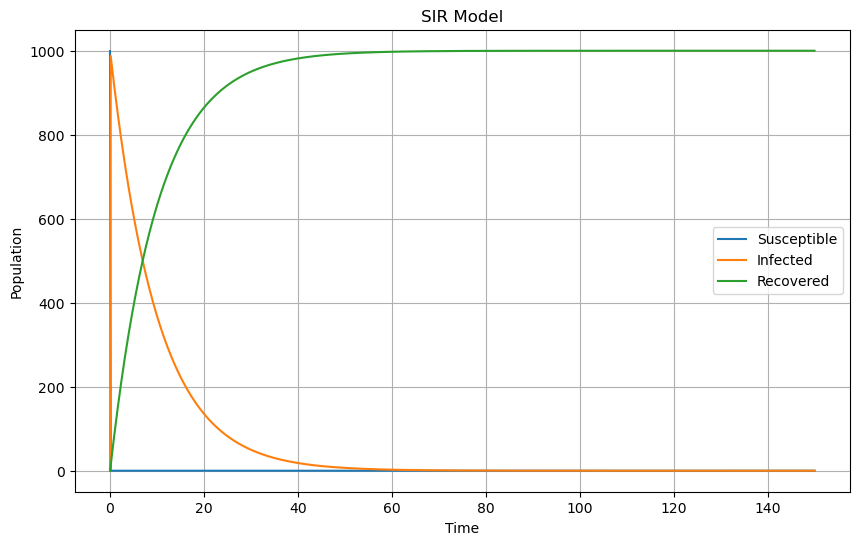

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SIR model differential equations
def sir_model(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = (beta * S * I) - (gamma * I)
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
S0 = 999  # Initial susceptible population
I0 = 1  # Initial infected population
R0 = 0   # Initial recovered population
beta = 0.3  # Transmission rate
gamma = 0.1  # Recovery rate

# Time vector
t = np.linspace(0, 150, 1000)

# Solve the differential equations
y0 = [S0, I0, R0]
solution = odeint(sir_model, y0, t, args=(beta, gamma))
S, I, R = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('SIR Model')
plt.grid()
plt.show()


## 1c

In the SIR (Susceptible-Infectious-Recovered) model, the dynamics of a pandemic are described by the interaction of three population compartments: susceptible (S), infected (I), and recovered (R). The dynamics are influenced by the parameters β (the transmission rate) and γ (the recovery rate). 
In the beginning, more and more people start getting infected (I), and the number of those who can still catch the disease (S) goes down. The outbreak really kicks in once the number of infected folks crosses a certain threshold. The peak of infections happens when the rate of new infections (βSI) is at its highest, and it's balanced by the rate of recoveries (γI). At this peak, the number of people who can catch the disease starts going up again, while the number of infected individuals starts going down. The high point of infections is decided by how β and γ interact. Now, there's this crucial number called R0, which influences the whole dance.
Here's the deal with R0:
- If R0 is less than 1: The disease won't cause a big outbreak. It'll fizzle out over time because each infected person passes the disease to fewer than one person, and the susceptible population bounces back.
- If R0 is exactly 1: The disease becomes endemic, meaning there's a stable number of cases. It doesn't really grow or shrink significantly.
- If R0 is greater than 1: Brace yourself for a major outbreak. The number of infected individuals will hit a peak, and the larger the R0, the more serious the outbreak becomes.


# HW-2

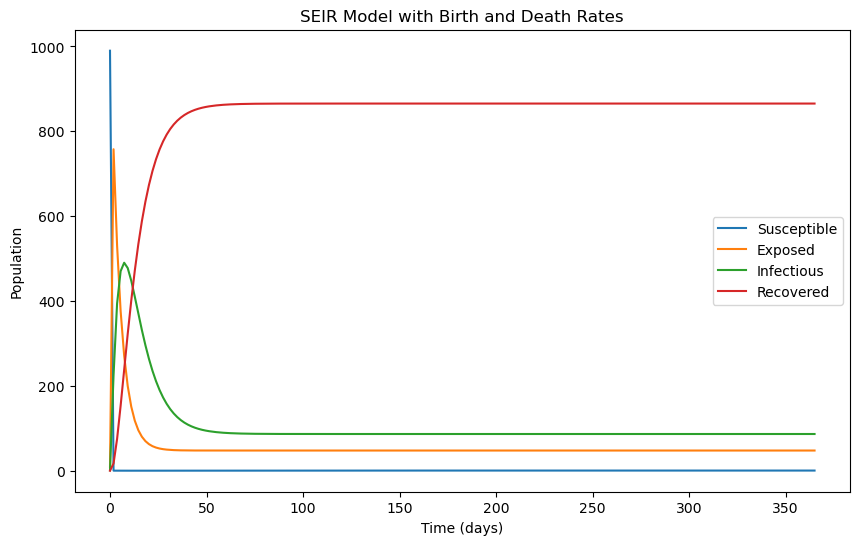

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# SEIR model parameters
N = 1000  # Total population
beta = 0.3  # Transmission rate
sigma = 0.2  # Rate of latent individuals becoming infectious
gamma = 0.1  # Rate of recovery
mu = 0.01  # Natural death rate

# Initial conditions
S0 = 990  # Initial susceptible population
E0 = 9    # Initial exposed population
I0 = 1    # Initial infectious population
R0 = 0    # Initial recovered population

# Initial vector
y0 = [S0, E0, I0, R0]

# Time grid (in days)
t = np.linspace(0, 365, 200)

# SEIR model equations
def seir_model(y, t, N, beta, sigma, gamma, mu):
    S, E, I, R = y
    dSdt = (mu * N) - (beta * S * I ) - (mu * S)
    dEdt = (beta * S * I) - ((sigma + mu) * E)
    dIdt = (sigma * E) - ((gamma + mu) * I)
    dRdt = (gamma * I) - (mu * R)
    return [dSdt, dEdt, dIdt, dRdt]

# Solve the differential equations
solution = odeint(seir_model, y0, t, args=(N, beta, sigma, gamma, mu))
S, E, I, R = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I, label='Infectious')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.legend()
plt.title('SEIR Model with Birth and Death Rates')
plt.show()


## 2c

In this disease model, we've got this group called "Exposed," which includes people who've been infected but aren't yet spreading the disease. It's like a waiting room before they become infectious. This helps make the curve of people getting sick over time look smoother, thanks to this buffer time.

Now, the transition from "Susceptible" to "Exposed" happens at a rate determined by how fast the disease spreads (we call it the transmission rate, denoted as β). So, it's like people are moving from the group that can catch the disease to the group that's been exposed but isn't spreading it just yet.

This model also considers the natural stuff that happens in a population, like births and deaths. When new folks are born (at a rate μN), they join the group that can catch the disease. And, of course, people sadly pass away too (at rates μS, μE, μI, and μR), affecting each group.

Now, why does this matter? Well, the birth rate and death rate can mess with the total population size. More births or fewer deaths can make the population bigger, which might affect how the disease spreads.

And get this: the introduction of the "Exposed" group affects a few things. The total population size, for one – births and deaths can change it. The peak of the disease, too – it might be smoother and more spread out compared to other models. Plus, how the disease spreads can be influenced by birth and death rates. More babies being born could mean more people susceptible to the disease, making it spread faster. On the flip side, higher death rates might shrink the group of people who can catch it. So, it's like a balancing act between who's being born, who's passing away, and how the disease is moving around.

